In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("CarPrice_Assignment.csv", index_col=0)

# Filters

A look at the data

In [3]:
print("This is the given training data")
train_data

This is the given training data


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [4]:
train_data['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [5]:
train_data['drivewheel'].value_counts()


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [6]:
train_data['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [7]:
train_data['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [8]:
def preprocess(X):
    X = X.drop(['CarName', 'price','symboling', 'doornumber', 'enginelocation', 'peakrpm', 'boreratio', 'stroke', 'citympg', 'highwaympg', 'fuelsystem', 'carheight'],axis=1)
    X['fueltype'] = X['fueltype'].map({'gas':1,'diesel':0})
    X['aspiration'] = X['aspiration'].map({'std':1,'turbo':0})
    
    return X

In [9]:
features = train_data
features = preprocess(features)
# test_data = preprocess(test_data)

This code applies the extract fn on the data columns and removes any rows with missing values across columns

In [10]:
features = features.dropna()

In [11]:
features

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,compressionratio,horsepower
car_ID,,,,,,,,,,,,,
1,1,1,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,9.0,111
2,1,1,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,9.0,111
3,1,1,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,9.0,154
4,1,1,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,10.0,102
5,1,1,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,8.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1,1,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,9.5,114
202,1,0,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,8.7,160
203,1,1,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,8.8,134


## One-hot Encoding

In [12]:
features = pd.get_dummies(features, columns=['carbody', 'drivewheel', 'enginetype', 'cylindernumber'], drop_first=True)
features.reset_index(drop=True, inplace=True)

In [13]:
features.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,compressionratio,horsepower,carbody_hardtop,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,1,88.6,168.8,64.1,2548,130,9.0,111,False,...,False,False,False,False,False,True,False,False,False,False
1,1,1,88.6,168.8,64.1,2548,130,9.0,111,False,...,False,False,False,False,False,True,False,False,False,False
2,1,1,94.5,171.2,65.5,2823,152,9.0,154,False,...,False,False,True,False,False,False,True,False,False,False
3,1,1,99.8,176.6,66.2,2337,109,10.0,102,False,...,True,False,False,False,False,True,False,False,False,False
4,1,1,99.4,176.6,66.4,2824,136,8.0,115,False,...,True,False,False,False,True,False,False,False,False,False


# Visualization

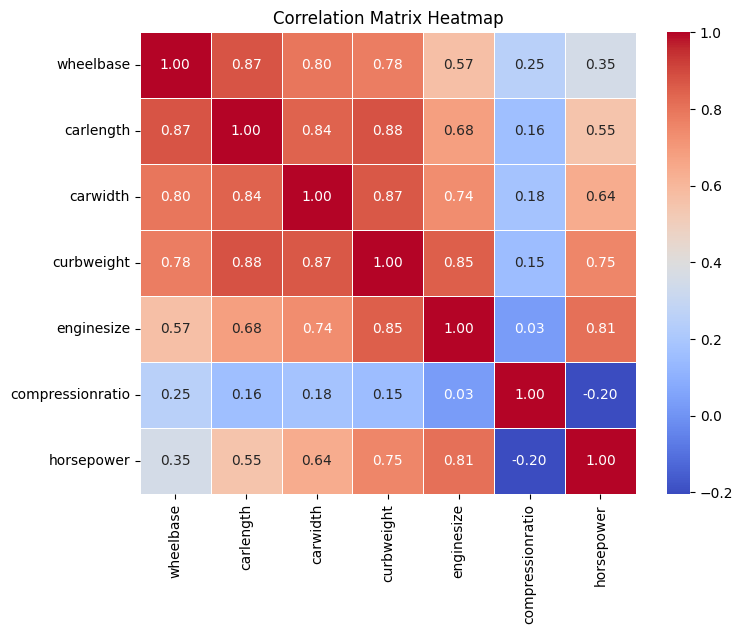

In [14]:
correlation_matrix = features.iloc[:,2:9].corr() # Generating the matrix for the columns without boolean values.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Starting the training of the Model

In [15]:
X_train = features
y_train = train_data['price'].values

The following normalizes the inputs of the model between 0 and 1

In [16]:
def zscore_normalize (X) :
    mu     = np.mean(X, axis=0) # Calculating the mean
    sigma  = np.std(X, axis=0)  # Calculating the standard deviation
    X_norm = (X - mu) / sigma 

    return X_norm

In [17]:
X_train = zscore_normalize(X_train)
X_train

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,compressionratio,horsepower,carbody_hardtop,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0.328798,0.469295,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,-0.288349,0.174483,-0.201517,...,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
1,0.328798,0.469295,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,-0.288349,0.174483,-0.201517,...,-1.611363,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
2,0.328798,0.469295,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-0.288349,1.264536,-0.201517,...,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069
3,0.328798,0.469295,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.035973,-0.053668,-0.201517,...,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
4,0.328798,0.469295,0.107110,0.207256,0.230001,0.516807,0.218885,-0.540725,0.275883,-0.201517,...,0.620593,-0.280976,-0.260208,-0.141069,4.199567,-1.859172,-0.364138,-0.070014,-0.070014,-0.141069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.328798,0.469295,1.721873,1.198549,1.398245,0.763241,0.339248,-0.162161,0.250533,-0.201517,...,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
201,0.328798,-2.130854,1.721873,1.198549,1.351515,0.949992,0.339248,-0.364062,1.416637,-0.201517,...,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,0.537874,-0.364138,-0.070014,-0.070014,-0.141069
202,0.328798,0.469295,1.721873,1.198549,1.398245,0.878757,1.109571,-0.338824,0.757535,-0.201517,...,-1.611363,-0.280976,3.843076,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069
203,-3.041381,-2.130854,1.721873,1.198549,1.398245,1.273437,0.435538,3.244916,0.047732,-0.201517,...,0.620593,-0.280976,-0.260208,-0.141069,-0.238120,-1.859172,2.746210,-0.070014,-0.070014,-0.141069


This code initializes values for a linear regression model

In [18]:
#seed helps in generating the same random values each time ensuring reproducibility in code
np.random.seed(0)   
weights = np.random.rand(X_train.shape[1]) # assigning weights to every input helps you find how much each input contributes to the ouptut
bias = 0.0 # gets updated during the training
learning_rate = 0.01 # determines how much weights change during training
num_iterations = 10000 # specifies the number of iterations
m = len(y_train) # stores the number of training examples. Training example is a single data point from the training dataset which is used to teach the model 

Gradient Descent code to train the linear regression model

In [19]:
# Gradient Descent with Loss Tracking
loss_history = []

for i in range(num_iterations): # runs for a pre-defined "num_iterations" times
    y_pred = np.dot(X_train, weights) + bias # calculates the predicted output for each training example
    error = y_pred - y_train # calculates the difference between the predicted values and the actual target

    mse_loss = np.mean(error ** 2)
    loss_history.append(mse_loss)
    
    weights_gradient = (2/m) * np.dot(X_train.T, error) # gradient tells us the direction and magnitude to adjust each weight to reduce the error.
    bias_gradient = (2/m) * np.sum(error) # tells how much to change the bais to improve predictions

    weights -= learning_rate * weights_gradient 
    bias -= learning_rate * bias_gradient   

y_train_pred = np.dot(X_train, weights) + bias

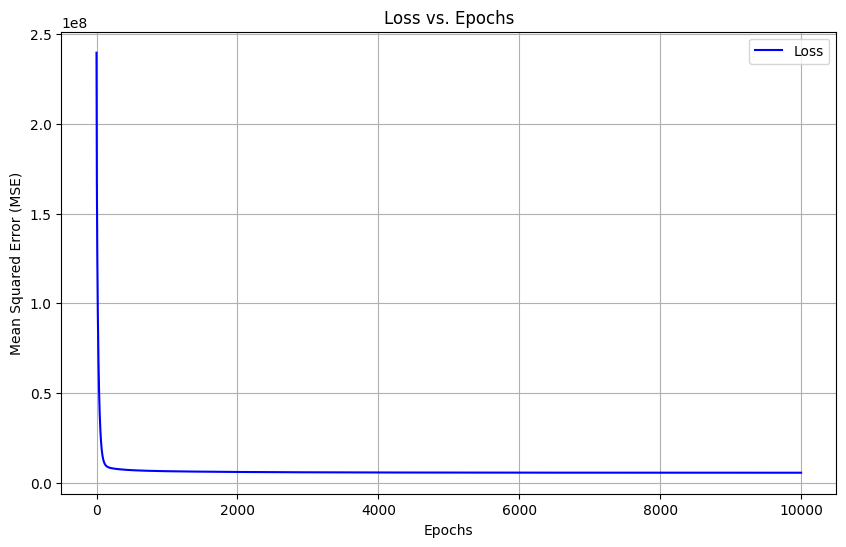

In [20]:
# Plotting the Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, color="b", label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

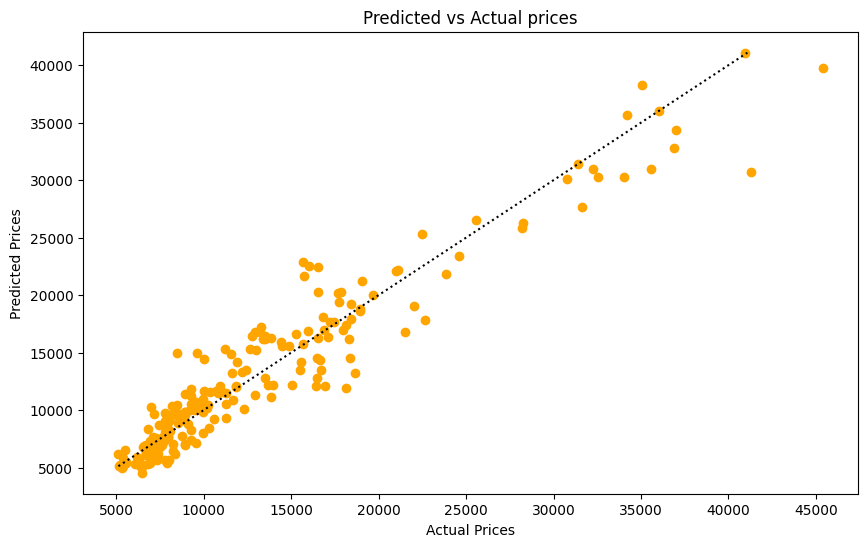

In [21]:
plt.figure(figsize=(10, 6))

# Scatter plot of the actual price vs the pedicted price
plt.scatter(y_train, y_pred, color = 'orange')

# Line plot of the best-fit line (model predictions)
plt.plot([min(y_train), max(y_pred)], [min(y_train), max(y_pred)], 'k:')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual prices')
plt.show()

Deals with any NaN values in the predicted and the actual outputs

In [23]:
if np.isnan(y_train).any() or np.isnan(y_train_pred).any(): 
    y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train)) 
    y_train_pred = np.nan_to_num(y_train_pred, nan=np.nanmean(y_train_pred))

In [25]:
y_mean = np.mean(y_train)
total = np.sum((y_train - y_mean) ** 2)
residual = np.sum((y_train - y_train_pred) ** 2)
r2 = 1-(residual / total)

In [26]:
print("R-squared (R²) for Test set:", r2)

R-squared (R²) for Test set: 0.9140890314322069
